# Regresja logistyczna

Model regresji logistycznej w R buduje się za pomocą funkcji `glm()`, która służy do dopasowania uogólnionych modeli liniowych. Funkcja ta wyznacza m.in. oszacowania współczynników `b` oraz wylicza wartości reszt. W celu budowy modelu regresji logistycznej należy przy wywołaniu funkcji `glm()` podać argument `family = "binomial"` (rodzina rozkładów dwumianowych).

Jako przykład wywołania funkcji `glm()` do budowy modelu regresji logistycznej wykorzystamy dane na temat cen domów z wykładu o regresji liniowej i wielorakiej (plik House-Price.csv). Aby samodzielnie przeanalizować przykład w RStudio, należy je najpierw poddać wstępnemu przetwarzaniu, podobnie jak na wykładzie). W najprostszym przypadku użyjemy tylko jednego predyktora: ceny (zmienna `price`) do przewidzenia czy dom zostanie sprzedany w przeciągu trzech miesięcy (zmienna `Sold`. Wartość 1 oznacza, że dom został sprzedany, 0 - nie sprzedany).

In [ ]:
library(readr)
df <- read_csv("House-Price.csv")
df$avg_dist = (df$dist1+df$dist2+df$dist3+df$dist4)/4

df2 <- df[,-6:-9]
df <- df2
rm(df2)

df <-df[,-13]

Rows: 506 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): airport, waterbody, bus_ter
dbl (16): price, resid_area, air_qual, room_num, age, dist1, dist2, dist3, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
glm.fit = glm(Sold~price, data = df, family = binomial)

summary(glm.fit)


Call:
glm(formula = Sold ~ price, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.61486    0.24751   2.484 0.012986 *  
price       -0.03572    0.01045  -3.417 0.000632 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 697.28  on 505  degrees of freedom
Residual deviance: 684.81  on 504  degrees of freedom
AIC: 688.81

Number of Fisher Scoring iterations: 4


W wyświetlonym podsumowaniu zostają przytoczone oceny współczynników dla kolejnych zmiennych objaśniających (w tym przypadku jedna zmienna `price`), odchylenia standardowe tych ocen, wartości statystyki testowej dla testu, w którym hipotezą zerową jest nieistotność danej zmiennej oraz p-wartość dla tego testu. Im p-wartość jest niższa, tym istotniejsza jest zmienna. Graficznie ta istotność jest przedstawiona gwiazdkami po prawej stronie. Wiersze tabeli odpowiadają zmiennym objaśniającym i wyrazowi wolnemu dopasowanego modelu.

Możemy odwołać się do konkretnych właściwości utworzonego obiektu klasy `glm`: - tabela oszacowań współczynników modelu (dodatkowo funkcja `$coef` lub `$coefficients` na obiekcie `summary`):

In [ ]:
glm.fit$coefficients

summary(glm.fit)$coef

(Intercept)       price 
  0.6148602  -0.0357225

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.6148602,0.24751240,2.484159,0.0129857765
price,-0.0357225,0.01045335,-3.417327,0.0006323935


-   dopasowane przez model prawdopodobieństwa "sukcesu" dla każdej z prób - wartości dopasowane przez model przekształcone przez funkcję wiążącą:

In [ ]:
glm.fit$fitted.values

1         2         3         4         5         6         7         8 
0.4396753 0.4608936 0.3487109 0.3593305 0.3366421 0.3988221 0.4493778 0.4564588 
        9        10        11        12        13        14        15        16 
0.5063594 0.4849308 0.5197454 0.4849308 0.4600061 0.4715610 0.4911786 0.4760140 
       17        18        19        20        21        22        23        24 
0.4476106 0.4974291 0.4733417 0.4911786 0.5322139 0.4786877 0.5179618 0.5242021 
       25        26        27        28        29        30        31        32 
0.5143933 0.5295449 0.5054665 0.5215285 0.4893931 0.4662234 0.5402091 0.5242021 
       33        34        35        36        37        38        39        40 
0.5357696 0.5366580 0.5331031 0.4849308 0.4751231 0.4662234 0.4379160 0.3809795 
       41        42        43        44        45        46        47        48 
0.3470900 0.4169374 0.4282685 0.4335245 0.4644459 0.4813626 0.4751231 0.5054665 
       49        50        51        52        53        54        55        56 
0.5250929 0.4804709 0.4777963 0.4706709 0.4308946 0.4449623 0.4849308 0.3430535 
       57        58        59        60        61        62        63        64 
0.4335245 0.3742631 0.4458448 0.4786877 0.4867155 0.5108234 0.4555726 0.4308946 
       65        66        67        68        69        70        71        72 
0.3626265 0.4440803 0.4804709 0.4573452 0.4983222 0.4671125 0.4379160 0.4600061 
       73        74        75        76        77        78        79        80 
0.4502618 0.4449623 0.4387955 0.4626693 0.4751231 0.4680018 0.4644459 0.4724513 
       81        82        83        84        85        86        87        88 
0.4048324 0.4405556 0.4326474 0.4493778 0.4405556 0.4169374 0.4529159 0.4555726 
       89        90        91        92        93        94        95        96 
0.4431986 0.3988221 0.4520309 0.4573452 0.4493778 0.4308946 0.4697810 0.4013943 
       97        98        99       100       101       102       103       104 
0.4626693 0.3169984 0.2789280 0.3609769 0.4091432 0.4178061 0.4876080 0.4813626 
      105       106       107       108       109       110       111       112 
0.4742323 0.4795792 0.4795792 0.4715610 0.4769051 0.4804709 0.4600061 0.4502618 
      113       114       115       116       117       118       119       120 
0.4858231 0.4867155 0.4885005 0.4902858 0.4644459 0.4822545 0.4715610 0.4813626 
      121       122       123       124       125       126       127       128 
0.4573452 0.4724513 0.4706709 0.4992152 0.4858231 0.4626693 0.5135009 0.5090379 
      129       130       131       132       133       134       135       136 
0.4929643 0.5259837 0.4822545 0.4786877 0.4484940 0.4893931 0.5143933 0.4920714 
      137       138       139       140       141       142       143       144 
0.4983222 0.5010014 0.5348810 0.4947501 0.5286549 0.5250929 0.5339922 0.5143933 
      145       146       147       148       149       150       151       152 
0.5481837 0.5304347 0.5143933 0.5233110 0.4947501 0.5161778 0.4617813 0.4786877 
      153       154       155       156       157       158       159       160 
0.5170698 0.4804709 0.5018944 0.5143933 0.5366580 0.2972393 0.4370369 0.4458448 
      161       162       163       164       165       166       167       168 
0.4134679 0.2366264 0.2366264 0.2366264 0.4511462 0.4308946 0.2366264 0.4414362 
      169       170       171       172       173       174       175       176 
0.4414362 0.4546868 0.4983222 0.4831465 0.4476106 0.4431986 0.4520309 0.3928421 
      177       178       179       180       181       182       183       184 
0.4467275 0.4344020 0.3885901 0.3287119 0.3085525 0.3366421 0.3232179 0.3667648 
      185       186       187       188       189       190       191       192 
0.4186753 0.3911393 0.2366264 0.3709228 0.3894392 0.3470900 0.3626265 0.3835101 
      193       194       195       196       197       198       199       200 
0.3350485 0.3784554 0.3954011 0.2366264

-   reszty dla każdej z prób:

In [ ]:
glm.fit$residuals

1         2         3         4         5         6         7         8 
-1.784680  2.169698 -1.535416 -1.560867 -1.507482  2.507384  2.225299  2.190778 
        9        10        11        12        13        14        15        16 
-2.025765 -1.941487  1.924019  2.062150  2.173884 -1.892366 -1.965326 -1.908448 
       17        18        19        20        21        22        23        24 
-1.810317  2.010337 -1.898764  2.035919 -2.137729 -1.918236  1.930644 -2.101732 
       25        26        27        28        29        30        31        32 
 1.944038 -2.125601  1.978371  1.917441  2.043347 -1.873443 -2.174902  1.907661 
       33        34        35        36        37        38        39        40 
-2.154103  1.863384 -2.141801  2.062150 -1.905209 -1.873443  2.283543  2.624813 
       41        42        43        44        45        46        47        48 
 2.881097  2.398441  2.334984  2.306675 -1.867225 -1.928129 -1.905209 -2.022108 
       49        50        51        52        53        54        55        56 
-2.105675 -1.924820  2.092942  2.124627  2.320753  2.247381 -1.941487 -1.522194 
       57        58        59        60        61        62        63        64 
-1.765301 -1.598116 -1.804548 -1.918236 -1.948237  1.957624 -1.836792 -1.757144 
       65        66        67        68        69        70        71        72 
-1.568939  2.251845 -1.924820 -1.842792  2.006734 -1.876569  2.283543 -1.851873 
       73        74        75        76        77        78        79        80 
-1.819048 -1.801680 -1.781882  2.161371 -1.905209 -1.879706  2.153103  2.116620 
       81        82        83        84        85        86        87        88 
 2.470158 -1.787488 -1.762572  2.225299 -1.787488  2.398441  2.207915 -1.836792 
       89        90        91        92        93        94        95        96 
 2.256325  2.507384 -1.824920  2.186532  2.225299  2.320753  2.128651  2.491316 
       97        98        99       100       101       102       103       104 
 2.161371  3.154590 -1.386824  2.770261 -1.692457  2.393455  2.050828  2.077436 
      105       106       107       108       109       110       111       112 
 2.108671  2.085161 -1.921522 -1.892366 -1.911699 -1.924820 -1.851873  2.220930 
      113       114       115       116       117       118       119       120 
-1.944856 -1.948237  2.047081  2.039627  2.153103  2.073594 -1.892366  2.077436 
      121       122       123       124       125       126       127       128 
 2.186532  2.116620  2.124627 -1.996866 -1.944856 -1.861051 -2.055502 -2.036817 
      129       130       131       132       133       134       135       136 
-1.972248 -2.109632 -1.931451 -1.918236  2.229684  2.043347  1.944038  2.032225 
      137       138       139       140       141       142       143       144 
 2.006734  1.996003  1.869575 -1.979219 -2.121588 -2.105675 -2.145887 -2.059280 
      145       146       147       148       149       150       151       152 
-2.213289  1.885246  1.944038 -2.097804 -1.979219  1.937317 -1.857981 -1.918236 
      153       154       155       156       157       158       159       160 
-2.070693  2.081292  1.992451  1.944038 -2.158233 -1.422959  2.288136  2.242933 
      161       162       163       164       165       166       167       168 
-1.704937 -1.309975 -1.309975 -1.309975  2.216576  2.320753 -1.309975  2.265333 
      169       170       171       172       173       174       175       176 
 2.265333  2.199316  2.006734  2.069766  2.234085  2.256325  2.212238 -1.647018 
      177       178       179       180       181       182       183       184 
 2.238501  2.302015 -1.635564 -1.489673 -1.446241 -1.507482 -1.477580 -1.579192 
      185       186       187       188       189       190       191       192 
 2.388486  2.556634 -1.309975 -1.589630  2.567795 -1.531605 -1.568939  2.607493 
      193       194       195       196       197       198       199       200 
 2.984643  2.642320  2.529077 -1.309975

-   rodzina rozkładów zmiennej objaśnianej oraz użyta funkcja wiążąca:

In [ ]:
glm.fit$family


Family: binomial 
Link function: logit 


-   liczba wykonanych iteracji algorytmu:

In [ ]:
glm.fit$iter

[1] 4

-   czy algorytm zakończył iterowanie bo znalazł maksimum (wartość `TRUE`) czy dlatego że wykonał więcej iteracji niż założono (wartość `FALSE`):

In [ ]:
glm.fit$converged

[1] TRUE

## Regresja logistyczna dla wielu zmiennych objaśniających

In [ ]:

glm.fit = glm(Sold~., data = df, family = binomial)

summary(glm.fit)


Call:
glm(formula = Sold ~ ., family = binomial, data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -2.082869   2.666027  -0.781 0.434648    
price                   -0.269424   0.033022  -8.159 3.38e-16 ***
resid_area               0.021153   0.026803   0.789 0.429999    
air_qual                -7.604377   2.704325  -2.812 0.004924 ** 
room_num                 1.066214   0.277766   3.839 0.000124 ***
age                     -0.001853   0.006610  -0.280 0.779236    
teachers                 0.305848   0.064132   4.769 1.85e-06 ***
poor_prop               -0.207984   0.033889  -6.137 8.40e-10 ***
airportYES              -0.172264   0.211907  -0.813 0.416263    
n_hos_beds               0.173106   0.071200   2.431 0.015046 *  
n_hot_rooms             -0.057136   0.052165  -1.095 0.273392    
waterbodyLake and River  0.022992   0.361260   0.064 0.949254    
waterbodyNone            0.093718   0.306716   0.306 0.759944    


Na podstawie uzyskanych wyników możemy zbudować model końcowy (złożony ze zmiennych `price`, `air_qual`, `room_num`, `teachers`, `poor_prop`, `n_hos_beds` oraz `av_dist`). W celu wybrania najlepszego modelu możemy też skorzystać z funkcji `step()`.

In [ ]:
model_koncowy <- glm(formula = Sold~price+air_qual+room_num+teachers+poor_prop+
                       n_hos_beds+avg_dist, data = df, family = binomial)
summary(model_koncowy)

step(model_koncowy, direction = "backward")


Call:
glm(formula = Sold ~ price + air_qual + room_num + teachers + 
    poor_prop + n_hos_beds + avg_dist, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.38996    2.18987  -0.635 0.525610    
price       -0.27311    0.03276  -8.337  < 2e-16 ***
air_qual    -4.67776    1.63793  -2.856 0.004292 ** 
room_num     1.00751    0.26822   3.756 0.000172 ***
teachers     0.30235    0.06246   4.841 1.29e-06 ***
poor_prop   -0.21423    0.03212  -6.671 2.55e-11 ***
n_hos_beds   0.16050    0.07009   2.290 0.022019 *  
avg_dist    -0.41799    0.08769  -4.767 1.87e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 686.12  on 497  degrees of freedom
Residual deviance: 562.94  on 490  degrees of freedom
  (8 observations deleted due to missingness)
AIC: 578.94

Number of Fisher Scoring iterations: 5


Start:  AIC=578.94
Sold ~ price + air_qual + room_num + teachers + poor_prop + n_hos_beds + 
    avg_dist

             Df Deviance    AIC
<none>            562.94 578.94
- n_hos_beds  1   568.25 582.25
- air_qual    1   571.28 585.28
- room_num    1   579.21 593.21
- teachers    1   588.24 602.24
- avg_dist    1   588.65 602.65
- poor_prop   1   619.47 633.47
- price       1   674.43 688.43



Call:  glm(formula = Sold ~ price + air_qual + room_num + teachers + 
    poor_prop + n_hos_beds + avg_dist, family = binomial, data = df)

Coefficients:
(Intercept)        price     air_qual     room_num     teachers    poor_prop  
    -1.3900      -0.2731      -4.6778       1.0075       0.3023      -0.2142  
 n_hos_beds     avg_dist  
     0.1605      -0.4180  

Degrees of Freedom: 497 Total (i.e. Null);  490 Residual
  (8 observations deleted due to missingness)
Null Deviance:	    686.1 
Residual Deviance: 562.9 	AIC: 578.9

Funkcja `vif` (z pakietu `car`) służy do zbadania współliniowości zmiennych:

In [ ]:
install.packages("car")

library(car)
vif(model_koncowy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



price   air_qual   room_num   teachers  poor_prop n_hos_beds   avg_dist 
  6.138414   3.405290   2.344649   1.691387   4.010196   1.029540   3.018423

Analizę końcowego modelu możemy wykonać za pomocą szans (ilorazu prawdopodobieństwa sukcesu do prawdopodobieństwa porażki)

In [ ]:
exp(coef(model_koncowy))

(Intercept)       price    air_qual    room_num    teachers   poor_prop 
0.249086098 0.761007474 0.009299867 2.738764402 1.353034507 0.807161160 
 n_hos_beds    avg_dist 
1.174098163 0.658369272

Szansa dla zmiennej `price` wynosi 0.76, co oznacza, że wraz ze wzrostem ceny o jedną jednostkę szansa na sprzedaż domu maleje o ok 24%. Natomiast wraz ze zwiększeniem się ilości nauczycieli przypadających na tysiąc mieszkańców o jeden (zmienna `teachers`), szansa sprzedania domu w tej okolicy wzrasta średnio o 35%.

## Zadania

1.  Wczytaj dane `lab4-dane.csv`. Zawierają one informacje na temat matek i ich dzieci, u których wykryto pewną rzadko występującą wadę wrodzoną (grupa badana) oraz zdrowych (grupa kontrolna).

In [ ]:
install.packages("dplyr")
library(dplyr)

dane <- read_delim("lab4-dane.csv", delim=";")

names(dane) <- gsub(" ", "", names(dane))
dane <- dane %>%
  mutate(
    GRUPA = as.factor(GRUPA),
    MiejsceZam = as.factor(MiejsceZam),
    Płeć = as.factor(Płeć),
    MasaUr = as.double(gsub(",", ".", MasaUr)),
    WiekM = as.integer(WiekM),
    KolCiazy = as.integer(KolCiazy),
    PoronSamo = as.logical(PoronSamo),
    InfOddech = as.logical(InfOddech),
    Palenie = as.logical(Palenie),
    WyksztM = as.factor(WyksztM),
    Wzawodowe = as.logical(Wzawodowe),
    Wsrednie = as.logical(Wsrednie),
    Wwyzsze = as.logical(Wwyzsze),
  )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 767 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (2): GRUPA, MasaUr
dbl (11): MiejsceZam, Płeć, Wiek M, KolCiazy, PoronSamo, InfOddech, Palenie,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


2.  Przeanalizuj dane oraz wyświetl podstawowe statystyki opisowe dla analizowanych zmiennych. Następnie narysuj histogramy dla zmiennych `Wiek` oraz `MasaUr`. Oceń rozkłady tych zmiennych.

In [ ]:
glimpse(dane)

Rows: 767
Columns: 13
$ GRUPA      <fct> badana, badana, badana, badana, badana, badana, badana, bad…
$ MiejsceZam <fct> 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, NA, 2, 2, 2…
$ Płeć       <fct> 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,…
$ MasaUr     <dbl> 2.75, 4.25, 3.75, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 4.25,…
$ WiekM      <int> 22, 27, 30, 32, 27, 21, 35, 24, 32, 18, 18, 28, 30, 27, 31,…
$ KolCiazy   <int> 1, 1, 2, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1,…
$ PoronSamo  <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALS…
$ InfOddech  <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, TRUE, FALSE, FALSE, …
$ Palenie    <lgl> NA, FALSE, TRUE, FALSE, NA, FALSE, FALSE, FALSE, FALSE, FAL…
$ WyksztM    <fct> 3, 2, 3, NA, NA, 2, 4, 3, 2, 3, 1, 4, 2, 1, 4, 3, 1, 4, 3, …
$ Wzawodowe  <lgl> FALSE, TRUE, FALSE, NA, NA, TRUE, FALSE, FALSE, TRUE, FALSE…
$ Wsrednie   <lgl> TRUE, FALSE, TRUE, NA, NA, FALSE, FALSE, TRUE, FALSE, TRUE,…
$ Wwyzsze    <lgl>

In [ ]:
head(dane)

GRUPA,MiejsceZam,Płeć,MasaUr,WiekM,KolCiazy,PoronSamo,InfOddech,Palenie,WyksztM,Wzawodowe,Wsrednie,Wwyzsze
<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<lgl>,<lgl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>
badana,1,1,2.75,22,1,FALSE,TRUE,NA,3,FALSE,TRUE,FALSE
badana,2,0,4.25,27,1,FALSE,FALSE,FALSE,2,TRUE,FALSE,FALSE
badana,1,1,3.75,30,2,FALSE,TRUE,TRUE,3,FALSE,TRUE,FALSE
badana,2,0,3.25,32,6,TRUE,FALSE,FALSE,NA,NA,NA,NA
badana,1,0,3.25,27,1,FALSE,FALSE,NA,NA,NA,NA,NA
badana,1,0,3.25,21,1,FALSE,TRUE,FALSE,2,TRUE,FALSE,FALSE


In [ ]:
summary(dane)

       GRUPA     MiejsceZam   Płeć         MasaUr          WiekM   
 badana   :395   1   :319   0   :332   Min.   :0.000   Min.   :-1  
 kontrolna:372   2   :443   1   :430   1st Qu.:3.250   1st Qu.:24  
                 NA's:  5   NA's:  5   Median :3.250   Median :28  
                                       Mean   :3.306   Mean   :28  
                                       3rd Qu.:3.750   3rd Qu.:31  
                                       Max.   :5.250   Max.   :47  
    KolCiazy      PoronSamo       InfOddech        Palenie        WyksztM   
 Min.   : 1.000   Mode :logical   Mode :logical   Mode :logical   1   : 82  
 1st Qu.: 1.000   FALSE:674       FALSE:641       FALSE:649       2   :180  
 Median : 2.000   TRUE :93        TRUE :105       TRUE :62        3   :283  
 Mean   : 1.905                   NA's :21        NA's :56        4   :204  
 3rd Qu.: 2.000                                                   NA's: 18  
 Max.   :10.000                                               

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



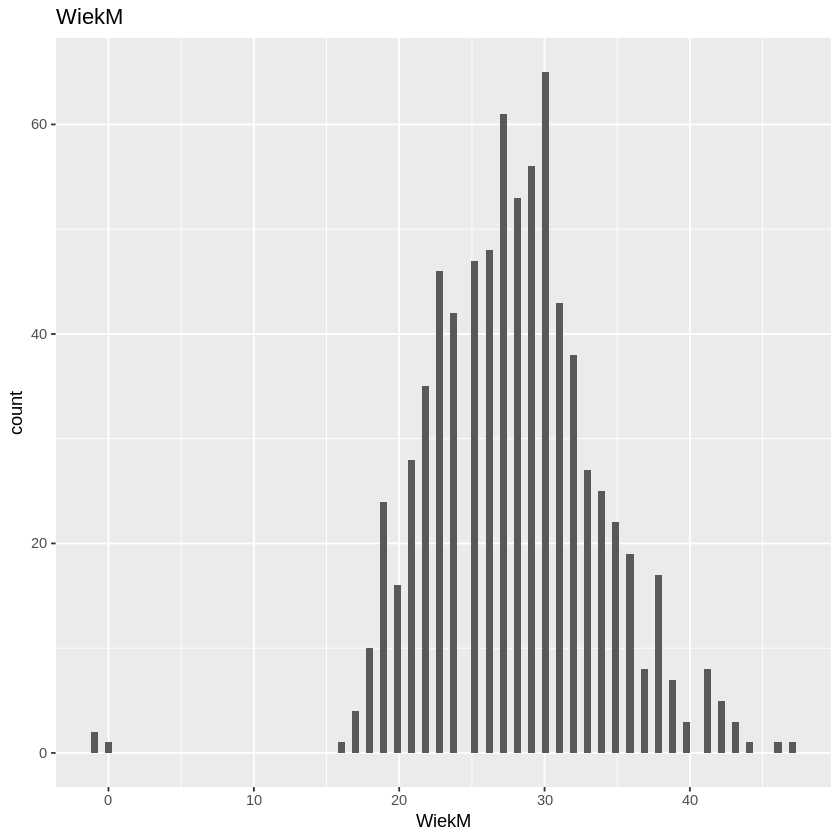

In [ ]:
install.packages("ggplot2")
library(ggplot2)
library(dplyr)

ggplot(dane, aes(x = WiekM)) +
    geom_histogram(bins=100) +
    ggtitle("WiekM")

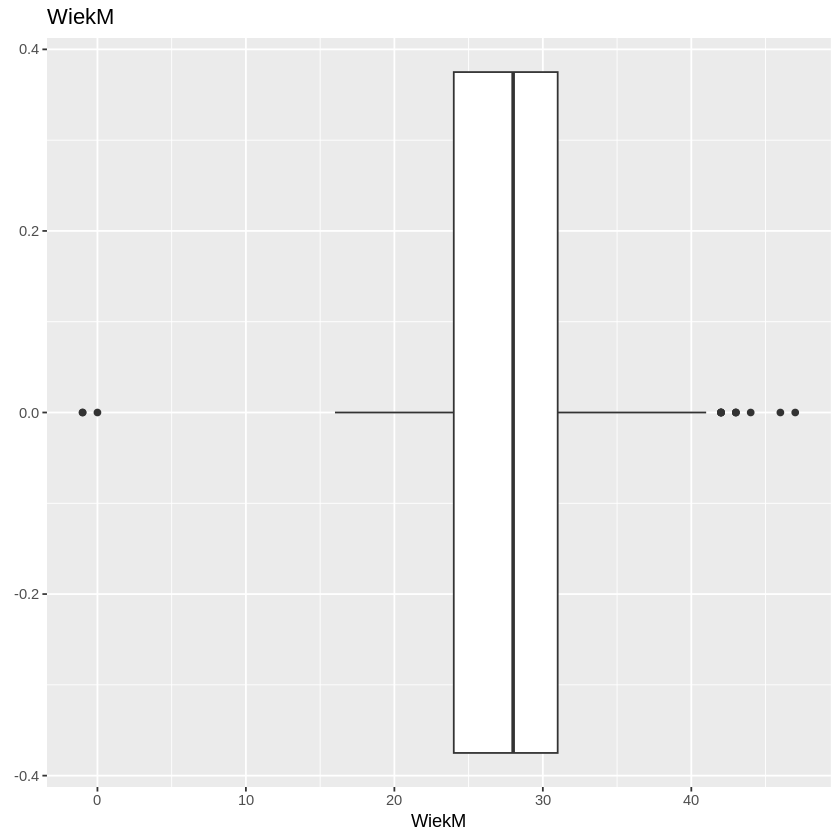

In [ ]:
ggplot(dane, aes(x = WiekM)) +
    geom_boxplot() +
    ggtitle("WiekM")

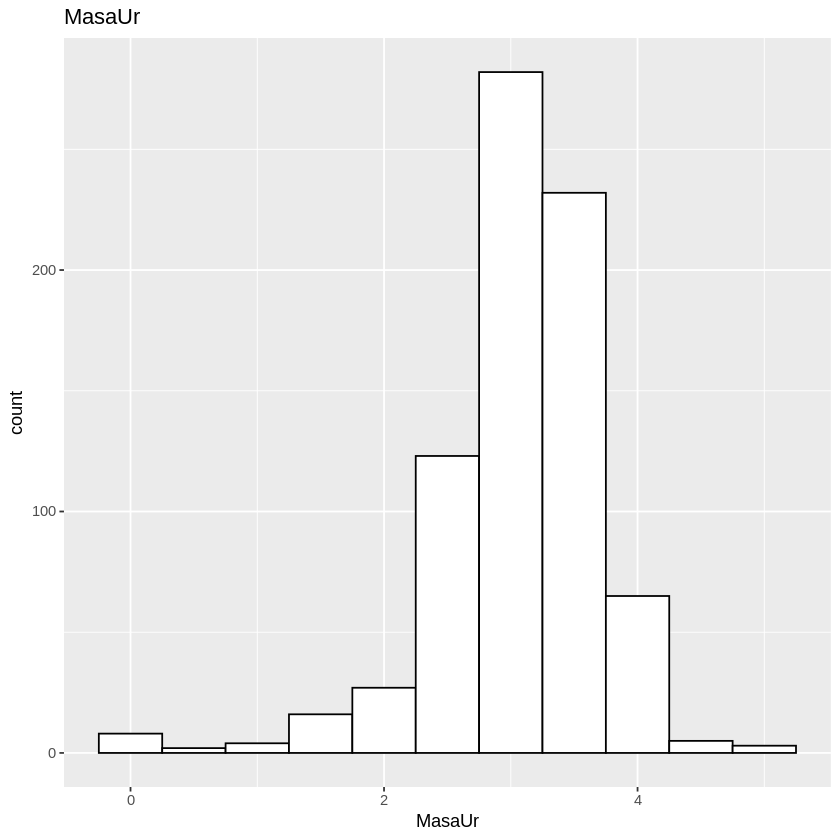

In [ ]:
ggplot(dane, aes(x = MasaUr)) +
    geom_histogram(bins=20, binwidth = .5, color = "black", fill = "white") +
    ggtitle("MasaUr")

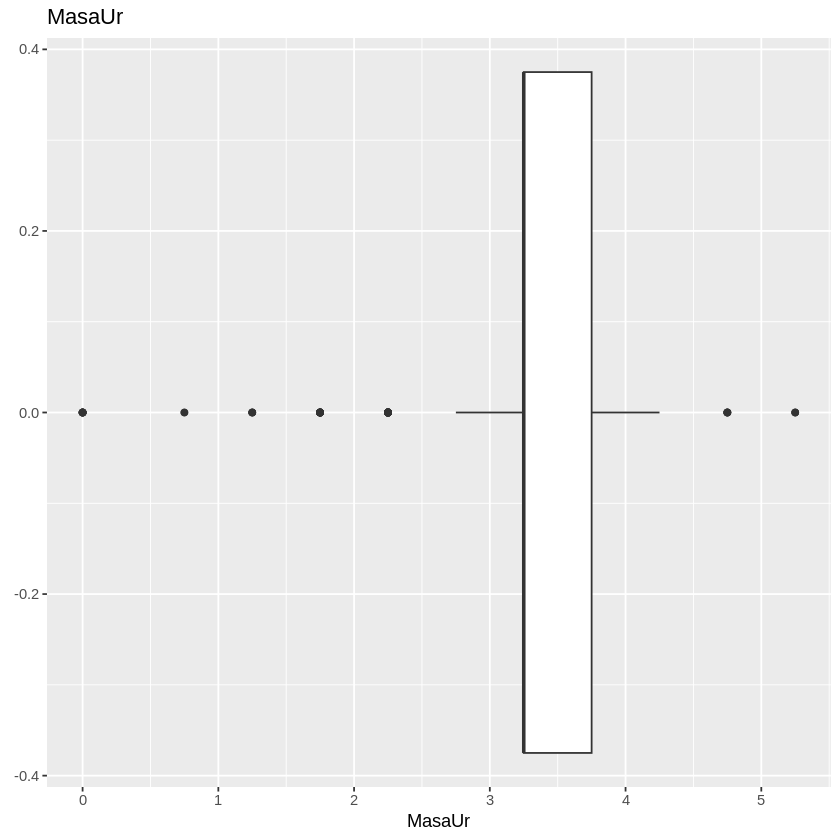

In [ ]:
ggplot(dane, aes(x = MasaUr)) +
    geom_boxplot() +
    ggtitle("MasaUr")

In [ ]:
dane <- dane %>%
    filter(WiekM > 0 & MasaUr > 0 )

In [ ]:
summary(dane)

       GRUPA     MiejsceZam   Płeć         MasaUr          WiekM      
 badana   :388   1   :314   0   :329   Min.   :0.750   Min.   :16.00  
 kontrolna:368   2   :437   1   :422   1st Qu.:3.250   1st Qu.:24.00  
                 NA's:  5   NA's:  5   Median :3.250   Median :28.00  
                                       Mean   :3.341   Mean   :28.08  
                                       3rd Qu.:3.750   3rd Qu.:31.00  
                                       Max.   :5.250   Max.   :47.00  
    KolCiazy      PoronSamo       InfOddech        Palenie        WyksztM   
 Min.   : 1.000   Mode :logical   Mode :logical   Mode :logical   1   : 81  
 1st Qu.: 1.000   FALSE:664       FALSE:632       FALSE:640       2   :176  
 Median : 2.000   TRUE :92        TRUE :103       TRUE :62        3   :281  
 Mean   : 1.901                   NA's :21        NA's :54        4   :200  
 3rd Qu.: 2.000                                                   NA's: 18  
 Max.   :10.000                          

In [ ]:
dane %>%
    filter(if_any(everything(), is.na)) %>%
    nrow()

[1] 87

In [ ]:
dane["MiejsceZam"][is.na(dane["MiejsceZam"])] <- as.factor(2)
dane["Płeć"][is.na(dane["Płeć"])] <- as.factor(1)
dane["MasaUr"][is.na(dane["MasaUr"])] <- as.double(mean(dane$MasaUr))
dane["WiekM"][is.na(dane["WiekM"])] <-as.integer(mean(dane$WiekM))
dane["KolCiazy"][is.na(dane["KolCiazy"])] <- as.integer(1)
dane["InfOddech"][is.na(dane["InfOddech"])] <- FALSE
dane["Palenie"][is.na(dane["Palenie"])] <- FALSE
dane["WyksztM"][is.na(dane["WyksztM"])] <- as.factor(3)
dane["Wzawodowe"][is.na(dane["Wzawodowe"])] <- FALSE
dane["Wsrednie"][is.na(dane["Wsrednie"])] <- TRUE
dane["Wwyzsze"][is.na(dane["Wwyzsze"])] <- FALSE

In [ ]:
dane %>%
    filter(if_any(everything(), is.na)) %>%
    nrow()

[1] 0

3.  Utwórz model regresji logistycznej by sprawdzić, które zmienne mogą wywierać istotny wpływ na występowanie wady. Następnie wybierz zmienne wpływowe i na ich podstawie utwórz model końcowy.

In [ ]:
levels(dane$GRUPA)

[1] "badana"    "kontrolna"

In [ ]:
dane$GRUPA <- relevel(dane$GRUPA, ref = "kontrolna")
levels(dane$GRUPA)

[1] "kontrolna" "badana"

In [ ]:
summary(glm(GRUPA~., data = dane, family = binomial))


Call:
glm(formula = GRUPA ~ ., family = binomial, data = dane)

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.93594    0.66942   2.892 0.003828 ** 
MiejsceZam2    0.06601    0.16274   0.406 0.685043    
Płeć1          0.53551    0.16169   3.312 0.000926 ***
MasaUr        -0.45577    0.14268  -3.194 0.001401 ** 
WiekM         -0.03043    0.01892  -1.608 0.107866    
KolCiazy       0.28586    0.09709   2.944 0.003238 ** 
PoronSamoTRUE -0.40558    0.28245  -1.436 0.151017    
InfOddechTRUE  1.32191    0.26533   4.982 6.29e-07 ***
PalenieTRUE    1.46410    0.40622   3.604 0.000313 ***
WyksztM2      -0.47595    0.32408  -1.469 0.141935    
WyksztM3      -0.68730    0.30896  -2.225 0.026110 *  
WyksztM4      -0.71559    0.34057  -2.101 0.035628 *  
WzawodoweTRUE       NA         NA      NA       NA    
WsrednieTRUE        NA         NA      NA       NA    
WwyzszeTRUE         NA         NA      NA       NA    


In [ ]:
model_1 <- glm(GRUPA ~ Płeć+MasaUr+KolCiazy+InfOddech+Palenie, data = dane, family = binomial)

4.  Oblicz współczynnik VIF dla modelu końcowego i sprawdź, czy występuje współliniowość w danych (współliniowość możemy też analizować za pomocą wykresu korelacji)

In [ ]:
vif(model_1)

Płeć    MasaUr  KolCiazy InfOddech   Palenie 
 1.042978  1.044465  1.006687  1.003818  1.007993

vif bliskie 1 -> brak istotnej współliniowości między zmiennymi

In [ ]:
dane$InfOddech <- as.numeric(dane$InfOddech)
dane$Palenie <- as.numeric(dane$Palenie)
dane$Płeć <- as.numeric(dane$Płeć)

In [ ]:
cor(dane[c(3, 4, 6, 8, 9)])

,Płeć,MasaUr,KolCiazy,InfOddech,Palenie
Płeć,1.00000000,0.14868637,-0.05793994,0.09196061,0.03871498
MasaUr,0.14868637,1.00000000,-0.07821655,-0.10696862,-0.17292027
KolCiazy,-0.05793994,-0.07821655,1.00000000,0.01954641,0.08705376
InfOddech,0.09196061,-0.10696862,0.01954641,1.00000000,0.13424765
Palenie,0.03871498,-0.17292027,0.08705376,0.13424765,1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



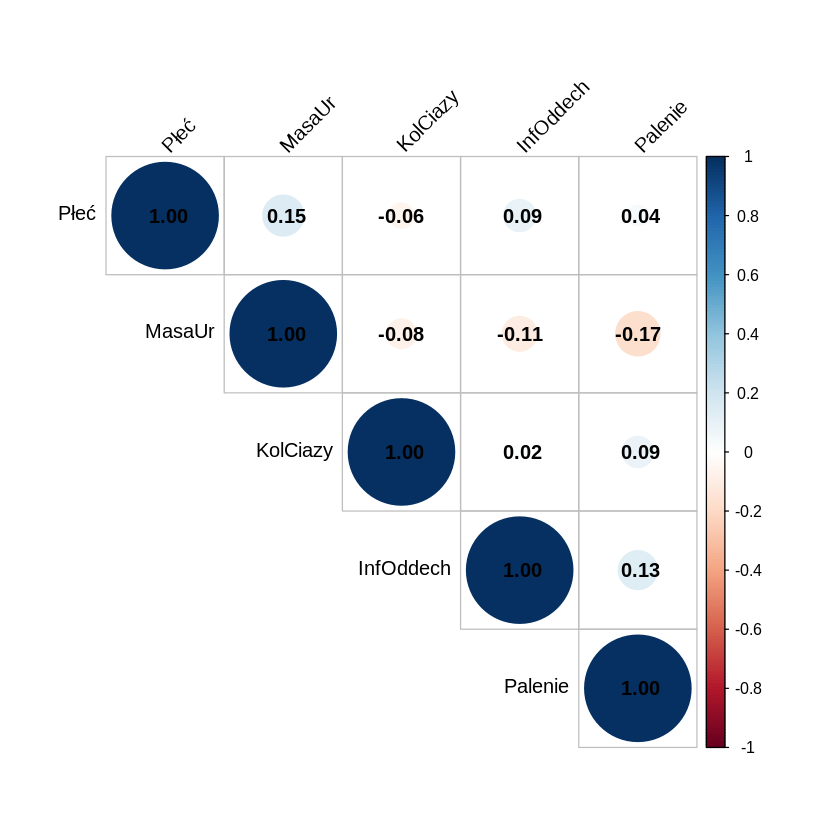

In [ ]:
install.packages("corrplot")
library(corrplot)

corrplot::corrplot(cor(dane[c(3, 4, 6, 8, 9)]), method = "circle", type = "upper", tl.col = "black", tl.srt = 45, addCoef.col = "black")

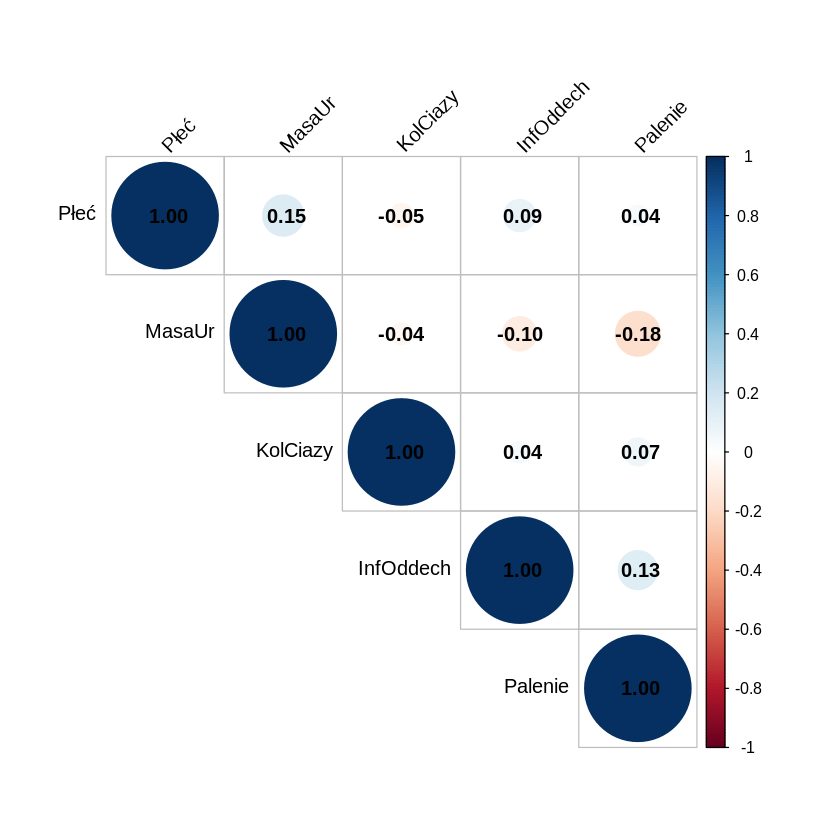

In [ ]:
corrplot::corrplot(cor(dane[c(3, 4, 6, 8, 9)], method = "spearman"), method = "circle", type = "upper", tl.col = "black", tl.srt = 45, addCoef.col = "black")

Oba wykresy pokazują, że zależności między zmiennymi są słabe. Różnice między Pearsonem a Spearmanem są minimalne, co oznacza, że nie ma silnych zależności nieliniowych ani monotonicznych.



5.  Wykonaj analizę modelu końcowego za pomocą szans.

In [ ]:
exp(coef(model_1))

(Intercept)         Płeć1        MasaUr      KolCiazy InfOddechTRUE 
    2.3359155     1.7104295     0.6042191     1.1955264     3.4782010 
  PalenieTRUE 
    5.3597106

1. Intercept jest większy od 1, co może sugerować, że w zbiorze danych mamy więcej chorych niż zdrowych.
2. Płeć: wartość 11.71 oznaczna, że płeć 1 ma 71% większe szanse w porównaniu do 0 na bycie chorym.
3. Masa urodzeniowa: wyższa masa działa ochronnie, bo jej wzrost obniża szanse na bycie chorym.
4. KolCiazy: wpływ jest niewielki, wartość 1.20 wskazuje, że ten czynnik zwiększa szanse wystąpienia wady o około 20%.
5. InfOddech i Palenie: oba czynniki znacząco zwiększają szanse na bycie chorym - są najistotniejszymi czynnikami w analizie.

